# Setup environment

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [2]:
#!pip install isicarchive
from isicarchive.api import IsicApi

### Logging into the ISIC Archive

In [1]:
# ISIC archive user
username = 'jordi.capdevila@gmail.com'
# local cache folder
cache_folder = 'apicache'
# local root dataset folder
dataset_root = 'datasets'
# create api object
api = IsicApi(username, cache_folder=cache_folder)

NameError: name 'IsicApi' is not defined

### Debugging of API calls

In [18]:
api._debug = True

### Caching information about all images

In [ ]:
# populate local image cache
api.cache_images()

### Object IDs and element representation

In [4]:
import json
image_info = api.image_cache[api.images['ISIC_0000000']]
print(json.dumps(image_info,indent=2))

{
  "_id": "5436e3abbae478396759f0cf",
  "_modelType": "image",
  "created": "2014-10-09T19:36:11.989000+00:00",
  "creator": {
    "_id": "5450e996bae47865794e4d0d",
    "name": "User 6VSN"
  },
  "dataset": {
    "_accessLevel": -1,
    "_id": "5a2ecc5e1165975c945942a2",
    "description": "Moles and melanomas.\nBiopsy-confirmed melanocytic lesions. Both malignant and benign lesions are included.",
    "license": "CC-0",
    "name": "UDA-1",
    "updated": "2014-11-10T02:39:56.492000+00:00"
  },
  "meta": {
    "acquisition": {
      "image_type": "dermoscopic",
      "pixelsX": 1022,
      "pixelsY": 767
    },
    "clinical": {
      "age_approx": 55,
      "anatom_site_general": "anterior torso",
      "benign_malignant": "benign",
      "diagnosis": "nevus",
      "diagnosis_confirm_type": null,
      "melanocytic": true,
      "sex": "female"
    }
  },
  "name": "ISIC_0000000",
  "notes": {
    "reviewed": {
      "accepted": true,
      "time": "2014-11-10T02:39:56.492000+00:0

### Image superpixels

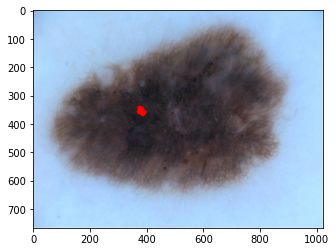

In [5]:
# paint over superpixel with index 472 in an image with red (RGB=(255,0,0))
image = api.image('ISIC_0000000')
image.load_image_data()
image.load_superpixels()
image.map_superpixels()
image_data = image.data
image_shape = image_data.shape
image_data.shape = (image_shape[0] * image_shape[1], -1)
map = image.superpixels['map']
superpixel_index = 472
pixel_count = map[superpixel_index, -1]
superpixel_pixels = map[superpixel_index, 0:pixel_count]
image_data[superpixel_pixels, 0] = 255
image_data[superpixel_pixels, 1] = 0
image_data[superpixel_pixels, 2] = 0
image_data.shape = image_shape

# show image
#%matplotlib inline
plt.imshow(image_data)
plt.show()

### Retrieving information about a study

In [6]:
import json
studies = api.study(limit=50)
print(json.dumps(studies,indent=2))

[
  {
    "_id": "573f11119fc3c132505c0ee7",
    "description": "",
    "name": "ISBI 2016: 100 Lesion Classification",
    "updated": "2016-11-08T10:25:45.485000+00:00"
  },
  {
    "_id": "5a32cde91165975cf58a469c",
    "description": "",
    "name": "ISIC Annotation Study - All Features",
    "updated": "2017-12-14T19:15:53.898000+00:00"
  }
]


### Retrieving datasets information

In [4]:
import json
datasets = api.dataset()
print(json.dumps(datasets,indent=2))

[
  {
    "_accessLevel": -1,
    "_id": "5aa2baff1165972a9e961672",
    "description": "100 clinical images comprising the dataset used in order to reply to \"Classification of the clinical images for benign and malignant cutaneous tumors using a deep learning algorithm\" by Seung Seog Han et al. JID, 2018",
    "license": "CC-0",
    "name": "2018 JID Editorial Images",
    "updated": "2018-03-09T16:49:03.002000+00:00"
  },
  {
    "_accessLevel": -1,
    "_id": "5faf0602c63be8c34c4acea1",
    "description": "Dermatoscopic images of the most common classes of skin lesions: Actinic Keratosis, Squamous Cell Carcinoma, Basal Cell Carcinoma, Seborrheic Keratosis, Solar Lentigo, Dermatofibroma, Nevi, Melanoma, and Vascular Lesions. Images are made available from the Department of Dermatology of the Hospital Cl\u00ednic de Barcelona for the preparation of the ISIC Challenge 2019.",
    "license": "CC-BY-NC",
    "name": "BCN_20000",
    "updated": "2019-03-22T14:40:32.319000+00:00"
  },
  

In [5]:
for i in range(len(datasets)):
    print(api.dataset(name=datasets[i]['name']))

ISIC Dataset "2018 JID Editorial Images" (id=5aa2baff1165972a9e961672, 100 reviewed images)
ISIC Dataset "BCN_20000" (id=5faf0602c63be8c34c4acea1, 12413 reviewed images)
ISIC Dataset "BCN_2020_Challenge" (id=5faf0efe7fe2fde5863882b8, 7311 reviewed images)
ISIC Dataset "Brisbane ISIC Challenge 2020" (id=5faf0f161057cb63a161b62f, 8449 reviewed images)
ISIC Dataset "Dermoscopedia (CC-0)" (id=5a74e97a11659731f017fabf, 0 reviewed images)
ISIC Dataset "Dermoscopedia (CC-BY)" (id=5a74e98011659731f017fac1, 5 reviewed images)
ISIC Dataset "Dermoscopedia (CC-BY-NC)" (id=5a74e98611659731f017fac3, 0 reviewed images)
ISIC Dataset "HAM10000" (id=5aaf6f2a116597691367292e, 10015 reviewed images)
ISIC Dataset "ISIC 2020 Challenge - MSKCC contribution" (id=5faf0f171057cb63a161b631, 11108 reviewed images)
ISIC Dataset "ISIC_2020_Vienna_part2" (id=5faf0f171057cb63a161b635, 2143 reviewed images)
ISIC Dataset "ISIC_2020_Vienna_part_1" (id=5faf0f171057cb63a161b633, 2231 reviewed images)
ISIC Dataset "MSK-1" 

### Download ISIC datasets

In [56]:
import os
import shutil
from tqdm import tqdm

# retrieve ISIC dataset information from all available
dataset_name = 'MSK-2'
selection = api.select_images(['dataset.name', 'in', dataset_name])
print(api.dataset(name=dataset_name))

NameError: name 'api' is not defined

In [10]:
# create dataset folder
if not os.path.exists(dataset_name):
    os.mkdir(dataset_root + os.sep + dataset_name)
    print("Create dataset folder: {} ".format(dataset_name) )
else:
    print("Path already exists...")

Create dataset folder: MSK-2 


In [11]:
# dataset metadata
api.write_csv(dataset_name + os.sep + 'metadata.csv', api.selected_metadata())
# dataset images
images = list(selection.keys())
# progress bar
pbar = tqdm(total=len(images))
for idx,s in enumerate(images):
    pbar.update(1)
    si = api.image(s)
    sname = si.name
    sid = si.id
    src = cache_folder + os.sep + sid[-2] + os.sep + sid[-1] + os.sep + 'image_' + sid + '_' + sname + '.jpg'
    dst = dataset_root + os.sep + + dataset_name + os.sep + sname + '.jpg'
    if not os.path.exists(src):
        si.load_image_data()
        si.clear_data()
    if os.path.exists(src):
        shutil.copyfile(src,dst)
    else:
        print(dst)
pbar.close() 

100%|██████████| 1535/1535 [46:57<00:00,  1.84s/it]


## Analyze Data

In [68]:
import os
import pandas as pd

dataset_name = 'MSK-2'
metadata = pd.read_csv(dataset_root + os.sep + dataset_name + os.sep + 'metadata.csv')
print(metadata.shape)

(1535, 17)


### Analyze medical diagnosis

In [69]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

metadata['clinical.diagnosis'].fillna('unknown',inplace=True)

le = LabelEncoder()
le.fit(metadata['clinical.diagnosis'])
LabelEncoder()

print("Classes:", list(le.classes_))
 
metadata['label'] = le.transform(metadata['clinical.diagnosis']) 
metadata.sample(10)

Classes: ['actinic keratosis', 'atypical melanocytic proliferation', 'basal cell carcinoma', 'lentigo NOS', 'lentigo simplex', 'melanoma', 'nevus', 'seborrheic keratosis', 'solar lentigo', 'unknown']


,image_id,image_name,image_created,dataset_name,acquisition.image_type,acquisition.pixelsX,acquisition.pixelsY,clinical.age_approx,clinical.anatom_site_general,clinical.benign_malignant,clinical.clin_size_long_diam_mm,clinical.diagnosis,clinical.diagnosis_confirm_type,clinical.family_hx_mm,clinical.melanocytic,clinical.personal_hx_mm,clinical.sex,label
710,558d6358bae47801cf734cde,ISIC_0010578,2015-06-26T14:36:08.578000+00:00,MSK-2,dermoscopic,1024,768,45,anterior torso,benign,6.0,unknown,single image expert consensus,False,NaN,False,male,9
10,558d6087bae47801cf73437b,ISIC_0009878,2015-06-26T14:24:07.903000+00:00,MSK-2,dermoscopic,1024,768,25,lower extremity,benign,5.0,nevus,histopathology,True,True,False,female,6
1224,558d645abae47801cf7352e4,ISIC_0011092,2015-06-26T14:40:26.894000+00:00,MSK-2,dermoscopic,1024,768,50,lower extremity,benign,4.0,nevus,histopathology,False,True,False,male,6
251,558d6138bae47801cf73477a,ISIC_0010119,2015-06-26T14:27:04.574000+00:00,MSK-2,dermoscopic,1024,768,70,lower extremity,malignant,5.0,melanoma,histopathology,False,True,True,male,5
837,558d6397bae47801cf734e5b,ISIC_0010705,2015-06-26T14:37:11.775000+00:00,MSK-2,dermoscopic,1024,768,60,anterior torso,benign,6.0,nevus,histopathology,False,True,False,male,6
1276,558d6475bae47801cf735380,ISIC_0011144,2015-06-26T14:40:53.886000+00:00,MSK-2,dermoscopic,1024,768,30,lower extremity,benign,6.0,nevus,histopathology,False,True,False,male,6
693,558d6350bae47801cf734cab,ISIC_0010561,2015-06-26T14:36:00.211000+00:00,MSK-2,dermoscopic,1024,768,70,head/neck,benign,7.0,nevus,histopathology,False,True,False,male,6
83,558d60adbae47801cf734456,ISIC_0009951,2015-06-26T14:24:45.825000+00:00,MSK-2,dermoscopic,1024,768,55,lower extremity,benign,4.0,nevus,histopathology,False,True,False,male,6
984,558d63e2bae47801cf735014,ISIC_0010852,2015-06-26T14:38:26.442000+00:00,MSK-2,dermoscopic,1024,768,30,lower extremity,malignant,5.0,melanoma,histopathology,True,True,False,female,5
1199,558d644ebae47801cf735299,ISIC_0011067,2015-06-26T14:40:14.359000+00:00,MSK-2,dermoscopic,1024,768,25,posterior torso,benign,10.0,nevus,single image expert consensus,False,True,False,male,6


### Data distribution: clinical diagnosis, sex, location and age

/home/jordi/venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='clinical.age_approx', ylabel='Density'>

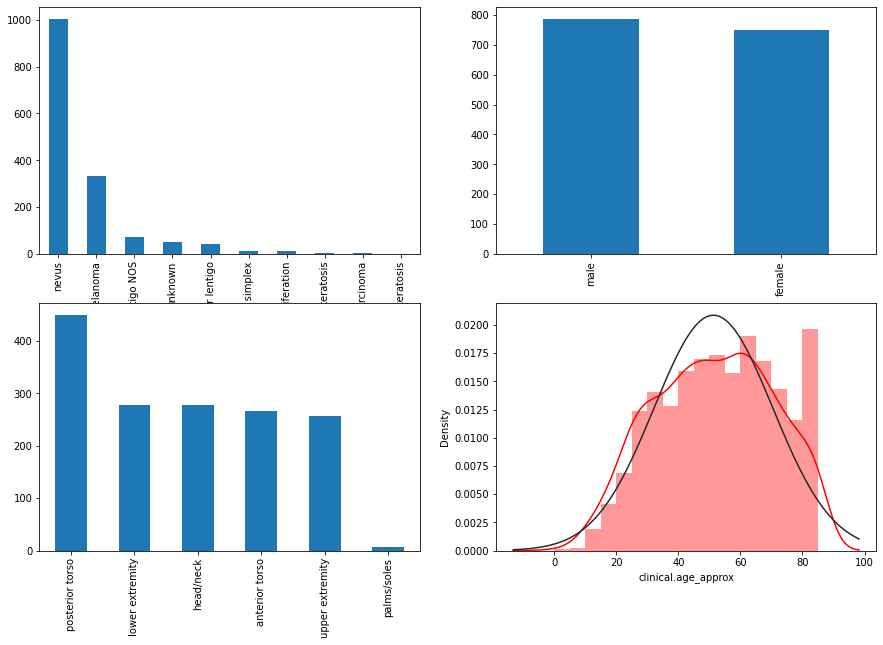

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fig, ax = plt.subplots(2, 2, figsize=(15,10))

metadata['clinical.diagnosis'].value_counts().plot(kind='bar', ax=ax[0,0])
metadata['clinical.sex'].value_counts().plot(kind='bar', ax=ax[0,1])
metadata['clinical.anatom_site_general'].value_counts().plot(kind='bar', ax= ax[1,0])
sample_age = metadata[pd.notna(metadata['clinical.age_approx'])]['clinical.age_approx']
sns.distplot(sample_age, fit=stats.norm, color='red', ax=ax[1,1])

## Display images

In [ ]:
## non-memory friendly!!!
from skimage import io
import os

# generate axis for subplots
num_rows = le.classes_.shape[0]
num_cols = 2

fig, ax = plt.subplots(num_rows, num_rows, figsize=(20,10))
np.vectorize(lambda ax:ax.axis('off'))(ax)

for i in range(num_rows):
    label = metadata[metadata['label'] == i]['image_name'][:num_rows]
    for idx,img in enumerate(label):
        #print('Class {}: {}'.format(i, img))
        file = dataset_root+os.sep+dataset_name+os.sep+img+'.jpg'
        if(os.path.exists(file)):
            disp=io.imread(file)
            ax[i,idx].imshow(disp)
            if(idx == 0):
                ax[i,idx].set_title('Class {}: {}'.format(i,le.classes_[i]))

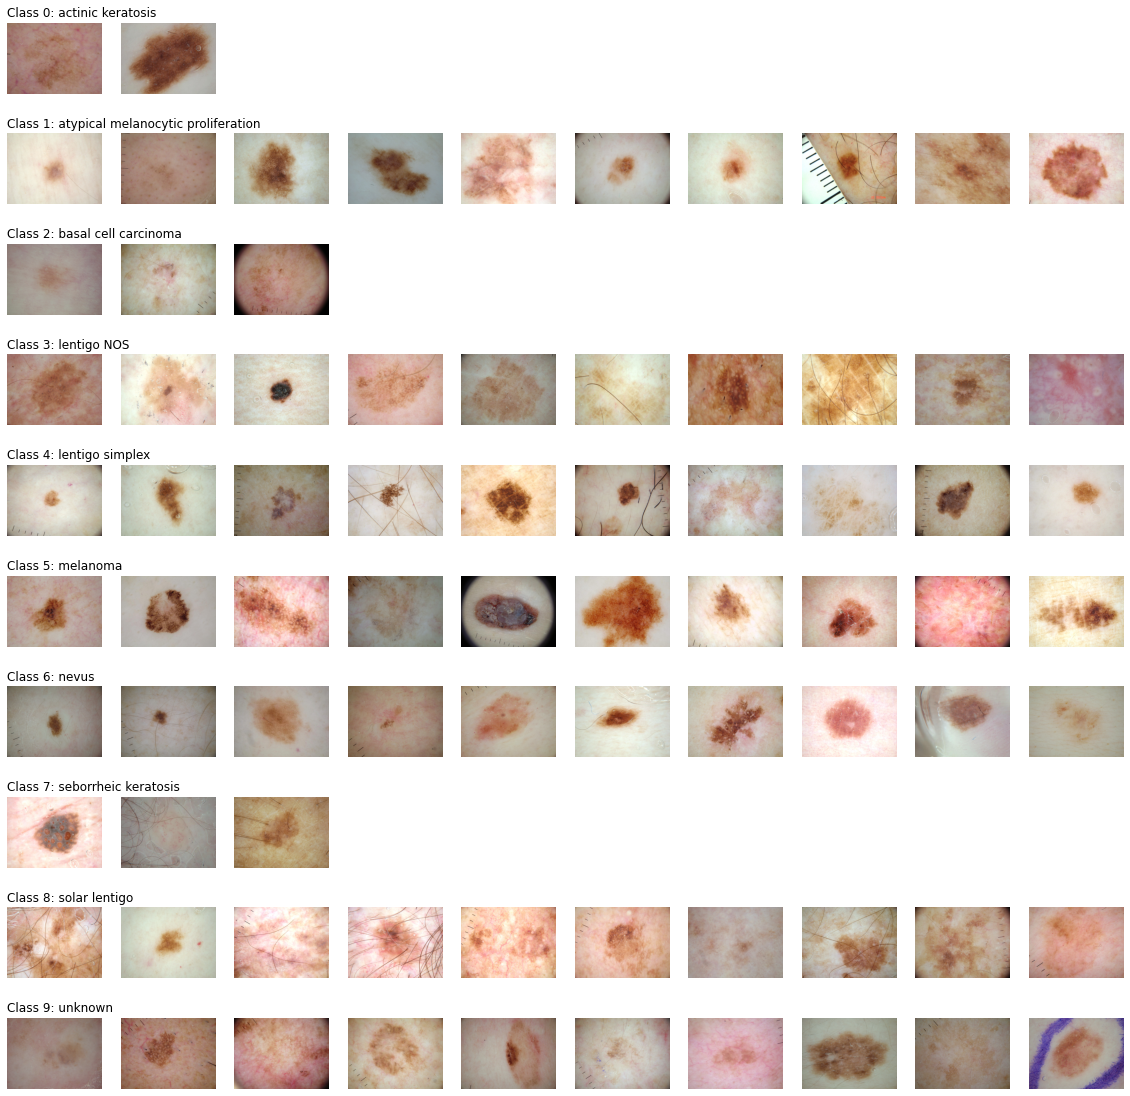

In [73]:
# best use PIL
from PIL import Image
import os

# generate axis for subplots
num_rows = le.classes_.shape[0]
num_cols = 10

fig, ax = plt.subplots(num_rows, num_rows, figsize=(20,20))
np.vectorize(lambda ax:ax.axis('off'))(ax)

for i in range(num_rows):
    label = metadata[metadata['label'] == i]['image_name'][:num_cols]
    for idx,img in enumerate(label):
        #print('Class {}: {}'.format(i, img))
        file = dataset_root+os.sep+dataset_name+os.sep+img+'.jpg'
        if(os.path.exists(file)):
            disp=Image.open(file)
            disp.thumbnail((256, 256), Image.ANTIALIAS)
            ax[i,idx].imshow(disp)
            if(idx == 0):
                ax[i,idx].set_title('Class {}: {}'.format(i,le.classes_[i]), loc='left')
        else:
            ax[i,idx].text(0.5,0.5,'?')

In [80]:
diagnosis = metadata['clinical.diagnosis'].value_counts()
counts = diagnosis / diagnosis.sum()
weights = counts.median(axis=0)/counts
weights

nevus                    0.043868
melanoma                 0.131737
lentigo NOS              0.619718
unknown                  0.936170
solar lentigo            1.000000
lentigo simplex          3.666667
seborrheic keratosis    14.666667
basal cell carcinoma    14.666667
actinic keratosis       22.000000
Name: clinical.diagnosis, dtype: float64

In [81]:
diagnosis = metadata['clinical.benign_malignant'].value_counts()
counts = diagnosis / diagnosis.sum()
weights = counts.median(axis=0)/counts
weights

benign       0.650814
malignant    2.157670
Name: clinical.benign_malignant, dtype: float64

In [79]:
metadata = metadata[(metadata['clinical.benign_malignant'] == 'benign')|( metadata['clinical.benign_malignant'] == 'malignant')]
metadata

,image_id,image_name,image_created,dataset_name,acquisition.image_type,acquisition.pixelsX,acquisition.pixelsY,clinical.age_approx,clinical.anatom_site_general,clinical.benign_malignant,clinical.clin_size_long_diam_mm,clinical.diagnosis,clinical.diagnosis_confirm_type,clinical.family_hx_mm,clinical.melanocytic,clinical.personal_hx_mm,clinical.sex,label
0,558d6082bae47801cf73435d,ISIC_0009868,2015-06-26T14:24:02.672000+00:00,MSK-2,dermoscopic,1024,768,70,posterior torso,malignant,4.0,melanoma,histopathology,False,True,False,female,5
1,558d6083bae47801cf734360,ISIC_0009869,2015-06-26T14:24:03.163000+00:00,MSK-2,dermoscopic,1024,768,40,posterior torso,benign,4.0,nevus,histopathology,False,True,True,female,6
2,558d6083bae47801cf734363,ISIC_0009870,2015-06-26T14:24:03.713000+00:00,MSK-2,dermoscopic,1024,768,40,upper extremity,benign,3.0,nevus,histopathology,False,True,True,female,6
3,558d6083bae47801cf734366,ISIC_0009871,2015-06-26T14:24:03.954000+00:00,MSK-2,dermoscopic,1024,768,45,posterior torso,benign,5.0,nevus,histopathology,False,True,False,male,6
4,558d6084bae47801cf734369,ISIC_0009872,2015-06-26T14:24:04.558000+00:00,MSK-2,dermoscopic,1024,768,50,head/neck,benign,3.0,nevus,histopathology,False,True,False,female,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,558d64f7bae47801cf73567a,ISIC_0011398,2015-06-26T14:43:03.522000+00:00,MSK-2,dermoscopic,1024,768,50,posterior torso,benign,10.0,nevus,histopathology,False,True,False,female,6
1531,558d64f7bae47801cf73567d,ISIC_0011399,2015-06-26T14:43:03.961000+00:00,MSK-2,dermoscopic,1024,768,85,posterior torso,malignant,9.0,melanoma,histopathology,False,True,False,male,5
1532,558d64f8bae47801cf735680,ISIC_0011400,2015-06-26T14:43:04.363000+00:00,MSK-2,dermoscopic,1024,768,50,upper extremity,benign,4.0,lentigo NOS,histopathology,False,True,False,female,3
1533,558d64f8bae47801cf735683,ISIC_0011401,2015-06-26T14:43:04.866000+00:00,MSK-2,dermoscopic,1024,768,35,upper extremity,benign,20.0,nevus,histopathology,NaN,True,False,female,6
